In [1]:
# import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt

In [2]:
# import csv file
df = pd.read_csv('Myntra Fasion Clothing.csv')

C:\Users\sahel\AppData\Local\Temp\ipykernel_2616\3961741504.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Myntra Fasion Clothing.csv')


In [3]:
df.shape

(526564, 13)

# Data Cleaning and Organizing


In [81]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [83]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

## Filling the missing value and drop columns

In [84]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
#drop unrelated/blank columns
df.drop(['Ratings', 'Reviews'], axis=1, inplace=True)

In [87]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption'],
      dtype='object')

In [88]:
#check for null values
pd.isnull(df).sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
dtype: int64

In [89]:
# drop null values
df.dropna(inplace=True)

In [90]:
pd.isnull(df).sum()

URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
DiscountOffer            0
SizeOption               0
dtype: int64

In [91]:
# change data type
df['DiscountPrice (in Rs)'] = df['DiscountPrice (in Rs)'].astype('int')

In [92]:
df['DiscountPrice (in Rs)'].dtypes

dtype('int32')

In [93]:
# change data type
df['OriginalPrice (in Rs)'] = df['OriginalPrice (in Rs)'].astype('int')

In [94]:
df['DiscountPrice (in Rs)'].dtypes

dtype('int32')

In [95]:
df['Category'].value_counts()

Category
Indian Wear                 136110
Topwear                      61319
Lingerie & Sleep Wear        45431
Bottom Wear                  45279
Sports Wear                  17081
Inner Wear &  Sleep Wear     15090
Plus Size                    12865
Western                         47
Name: count, dtype: int64

In [96]:
df['BrandName'].value_counts()

BrandName
Pothys             15572
KALINI              9399
HERE&NOW            6339
Ethnic basket       4758
Mitera              4650
                   ...  
Rajnie                 1
Belle Fille            1
PLATINUM Studio        1
Off Label              1
BARARA ETHNIC          1
Name: count, Length: 1621, dtype: int64

In [97]:
df['Individual_category'].value_counts()


Individual_category
sarees           55723
kurtas           35483
tshirts          35275
kurta-sets       25010
shirts           24130
                 ...  
jewellery-set        2
dungarees            1
lungi                1
bracelet             1
flip-flops           1
Name: count, Length: 90, dtype: int64

In [98]:
df['Individual_category'].unique()

array(['jeans', 'track-pants', 'shirts', 'shapewear', 'trousers',
       'tights', 'kurta-sets', 'kurtas', 'bath-robe', 'socks', 'tshirts',
       'tops', 'dresses', 'briefs', 'sarees', 'kurtis', 'bra',
       'night-suits', 'jackets', 'lounge-pants', 'palazzos', 'stockings',
       'shorts', 'boxers', 'trunk', 'sweatshirts', 'dupatta', 'tunics',
       'sweaters', 'skirts', 'thermal-tops', 'nightdress', 'pyjamas',
       'capris', 'sports-sandals', 'tracksuits', 'nehru-jackets',
       'lounge-tshirts', 'lounge-shorts', 'lehenga-choli', 'baby-dolls',
       'innerwear-vests', 'leggings', 'camisoles', 'thermal-set',
       'jeggings', 'blazers', 'saree-blouse', 'churidar',
       'dress-material', 'boots', 'jumpsuit', 'lingerie-set', 'sherwani',
       'co-ords', 'flats', 'thermal-bottoms', 'swimwear', 'patiala',
       'harem-pants', 'patiala-and-dupatta', 'lingerie-accessories',
       'salwar', 'saree-accessories', 'suits', 'dhotis', 'shawl',
       'rain-jacket', 'coats', 'outdoor-

In [99]:
df['category_by_Gender'].value_counts()

category_by_Gender
Women    178373
Men      154849
Name: count, dtype: int64

In [100]:
df['DiscountOffer'].value_counts()

DiscountOffer
50% OFF         35477
60% OFF         26056
20% OFF         20951
40% OFF         19919
55% OFF         17404
                ...  
Rs. 1028 OFF        1
Rs. 1396 OFF        1
Rs. 5520 OFF        1
Rs. 7750 OFF        1
Rs. 65 OFF          1
Name: count, Length: 1255, dtype: int64

# Data Visualization

## Gender

<Axes: xlabel='category_by_Gender'>

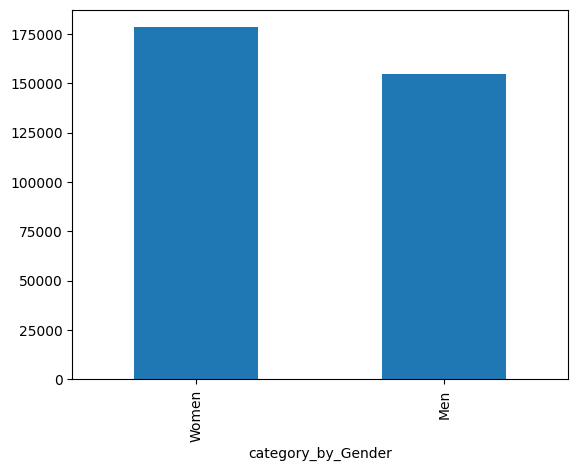

In [118]:
df.groupby('category_by_Gender')['Category'].count().sort_values(ascending=False).head(10).plot(kind='bar')

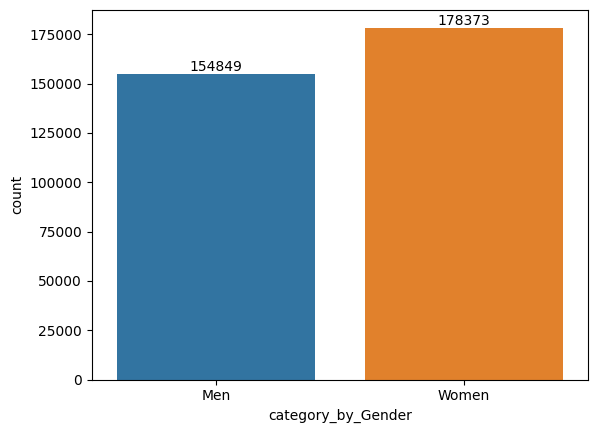

In [120]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'category_by_Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='category_by_Gender'>

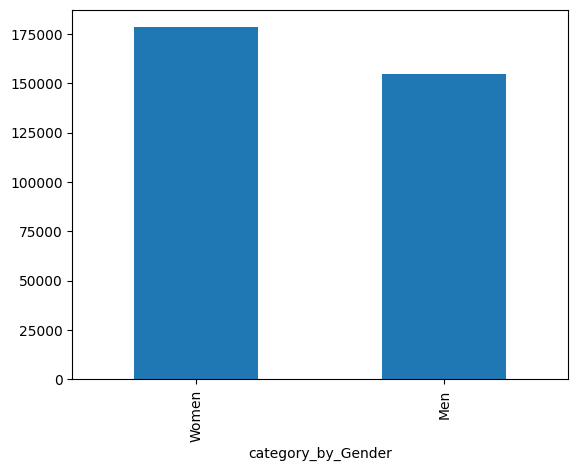

In [121]:
df.groupby('category_by_Gender')['DiscountOffer'].count().sort_values(ascending=False).head(10).plot(kind='bar')

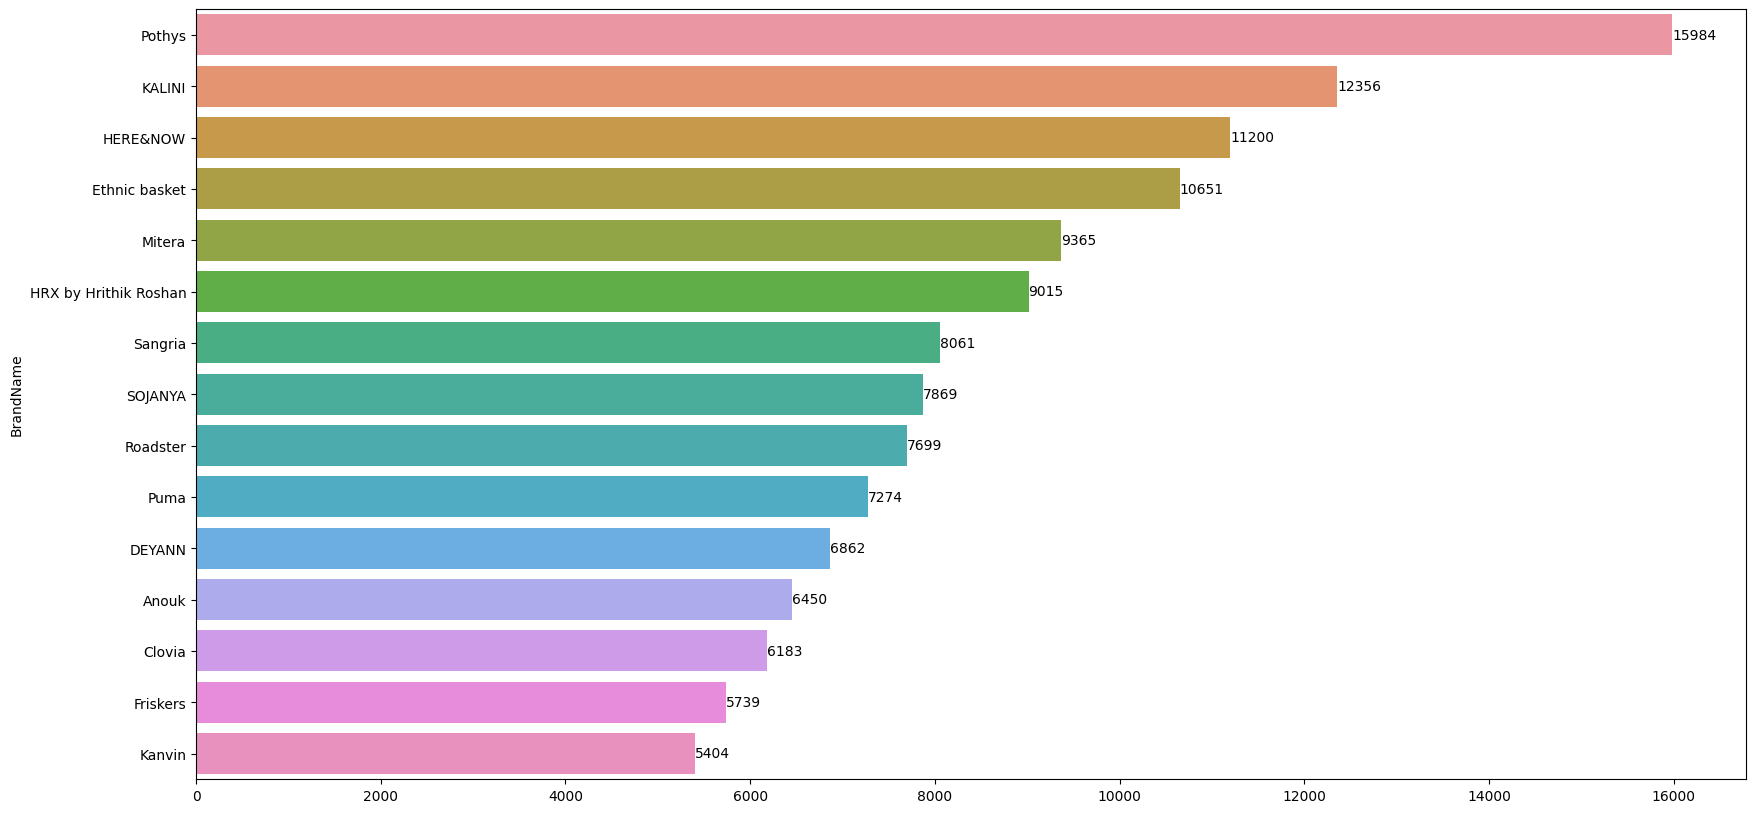

In [119]:
# Top 10 Brand on price based
plt.figure(figsize = (20,10))
ax=sns.barplot(x = df['OriginalPrice (in Rs)'].value_counts().head(15).values, y=df['BrandName'].value_counts().head(15).index)
for bars in ax.containers:
    ax.bar_label(bars)

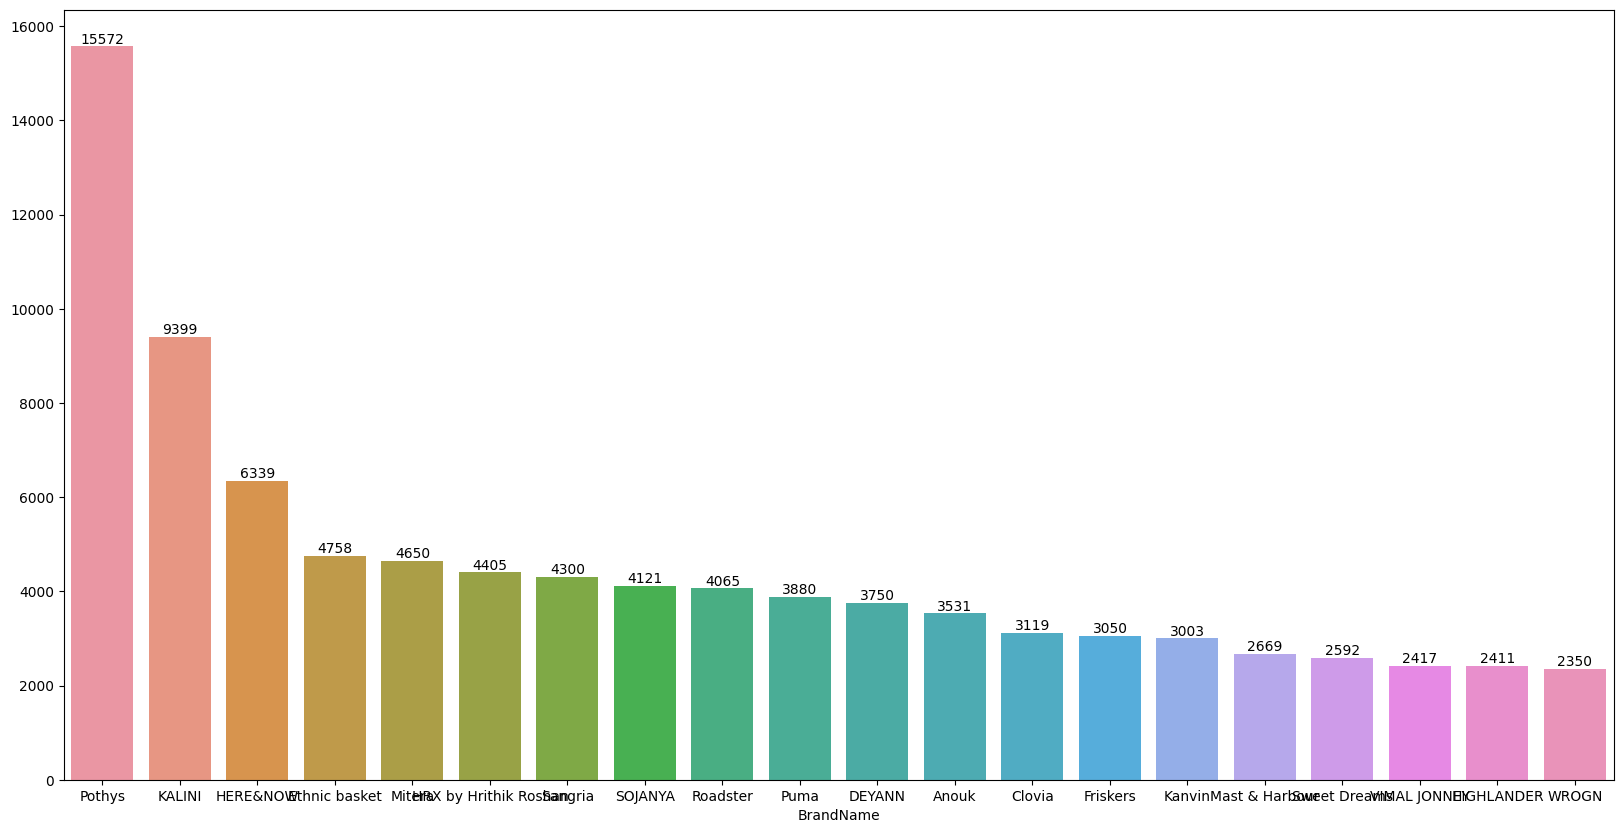

In [104]:
plt.figure(figsize = (20,10))

ax=sns.barplot( y=df['BrandName'].value_counts().head(20).values,x = df['BrandName'].value_counts().head(20).index)
for bars in ax.containers:
    ax.bar_label(bars)

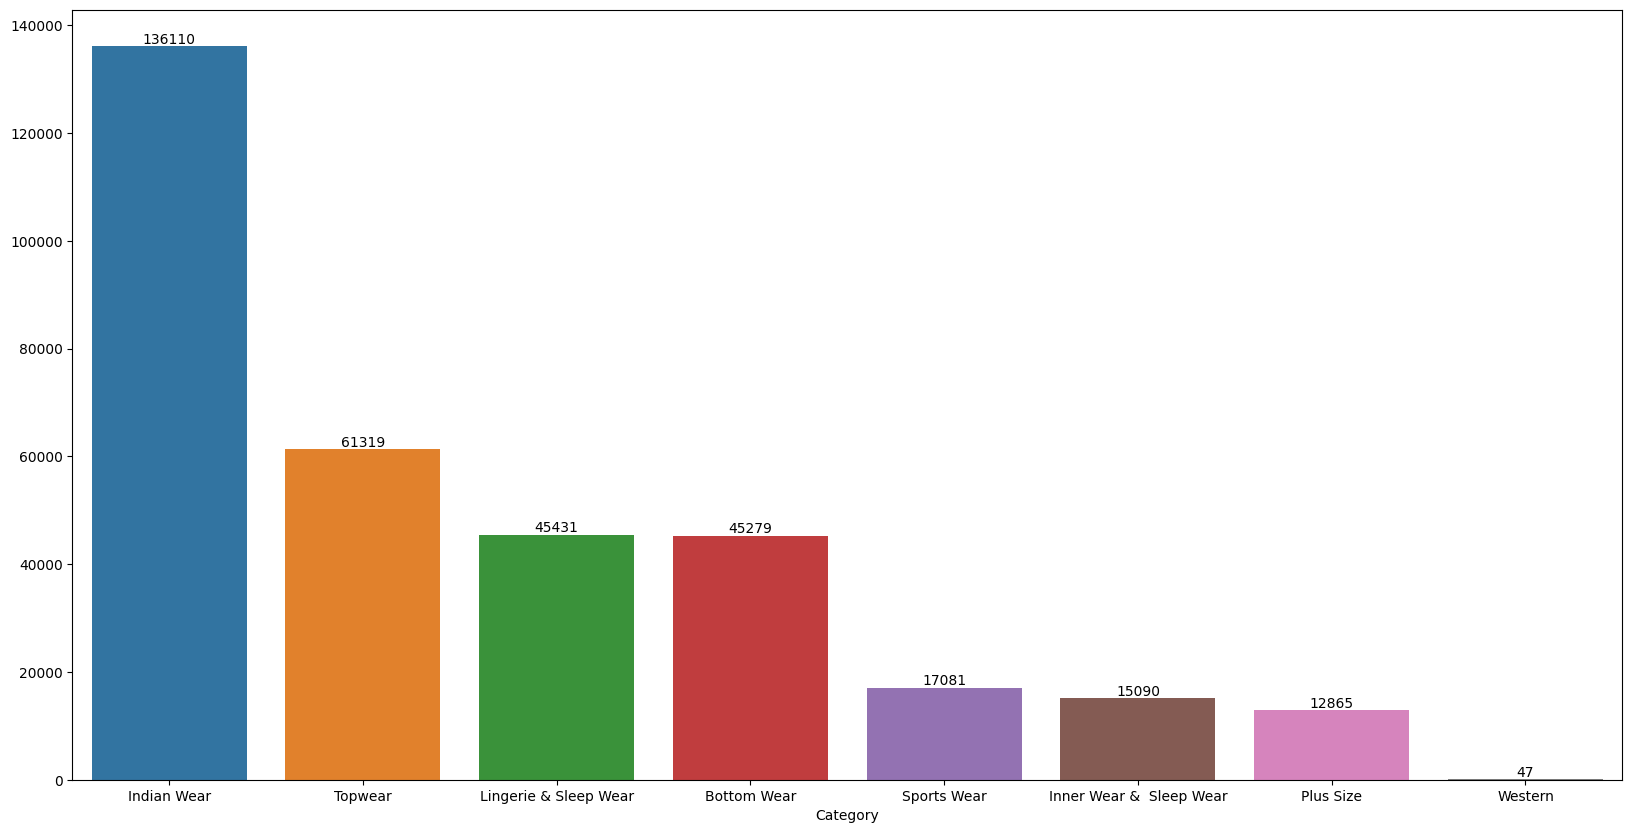

In [105]:
# TOP categorywise sales
plt.figure(figsize = (20,10))
ax=sns.barplot( y=df['Category'].value_counts().head(10).values,x = df['Category'].value_counts().head(10).index)
for bars in ax.containers:
    ax.bar_label(bars)

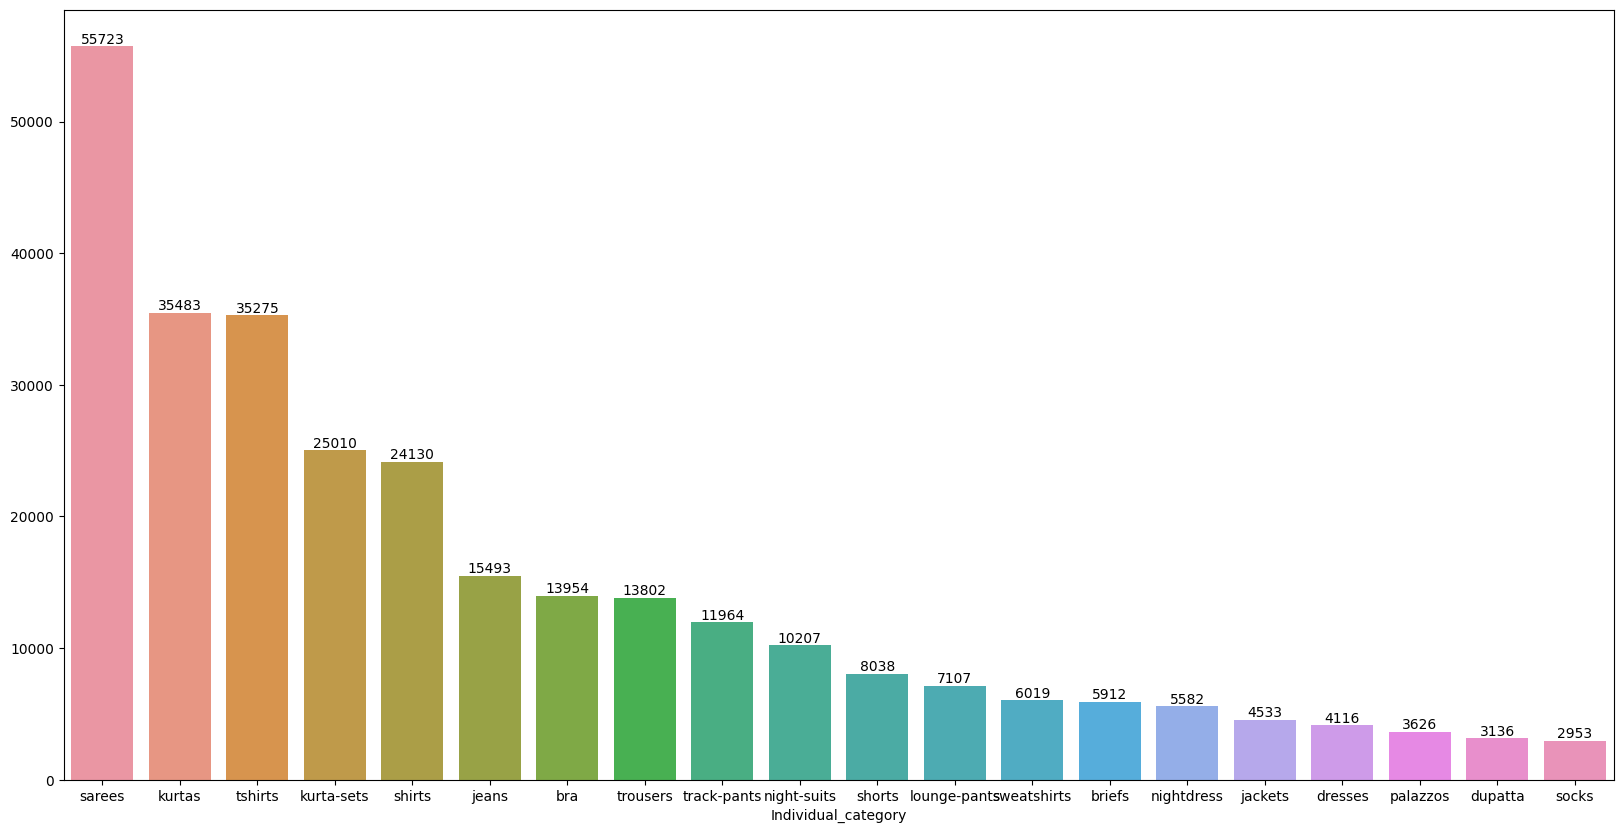

In [106]:
# TOP 10 INDIVIDULA CATEGORY
plt.figure(figsize = (20,10))
ax=sns.barplot(y=df['Individual_category'].value_counts().head(20).values,x = df['Individual_category'].value_counts().head(20).index)
for bars in ax.containers:
    ax.bar_label(bars)

# TOP BRAND UNDER TSHIRTS CATEGORY

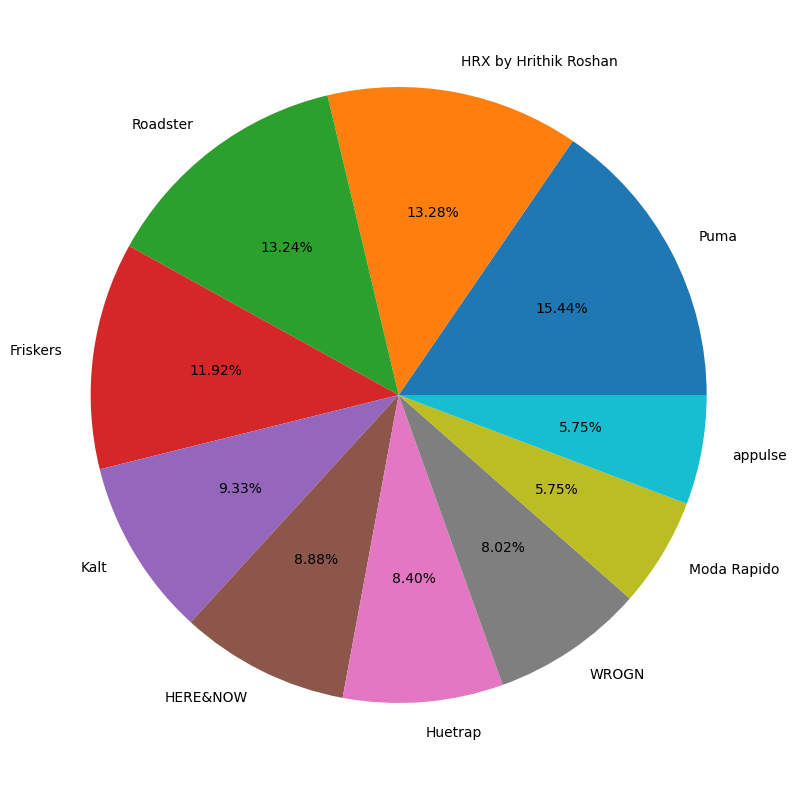

In [107]:
X = df[df['Individual_category'] == 'tshirts']
t = X['BrandName'].value_counts().head(10).values
r = X['BrandName'].value_counts().head(10).index

plt.figure(figsize = (20,10))
plt.pie(t[:10],labels=r[:10],autopct='%1.2f%%')
plt.show()

# TOP BRAND UNDER SAREES CATEGORY

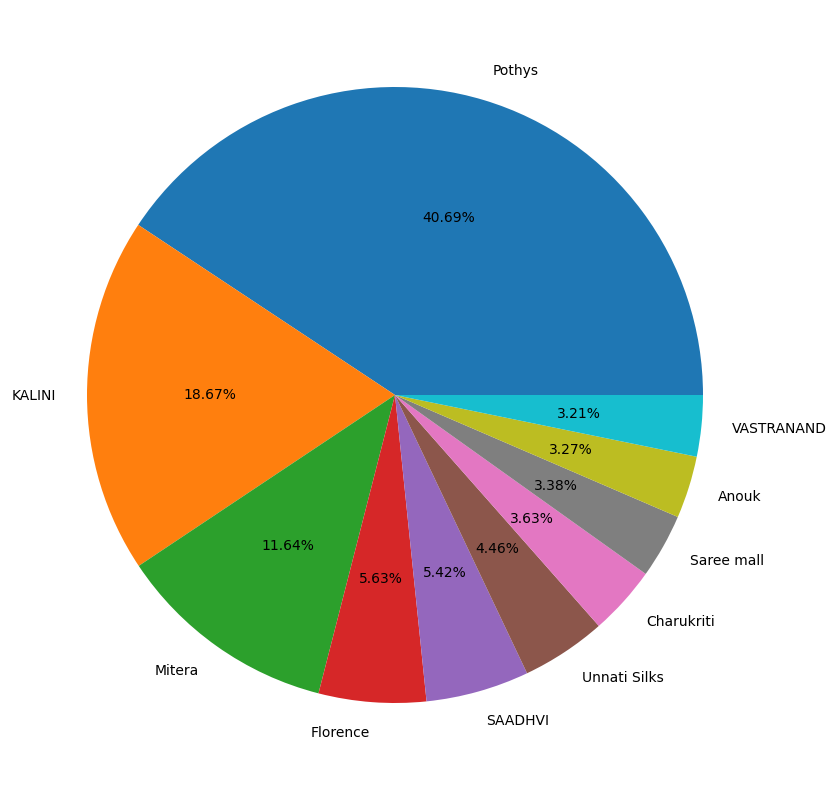

In [108]:
Y = df[df['Individual_category'] == 'sarees']
d  = Y['BrandName'].value_counts().head(10).values
g  = Y['BrandName'].value_counts().head(10).index

plt.figure(figsize = (20,10))

plt.pie(d[:15],labels=g[:15],autopct='%1.2f%%')
plt.show()

In [ ]:
Z = df[df['Individual_category'] == 'tops']

In [109]:
df.groupby(['Category']).Individual_category.agg(['count']).reset_index()

,Category,count
0,Bottom Wear,45279
1,Indian Wear,136110
2,Inner Wear & Sleep Wear,15090
3,Lingerie & Sleep Wear,45431
4,Plus Size,12865
5,Sports Wear,17081
6,Topwear,61319
7,Western,47


#  TOP BRAND IN TOPS CATEGORY

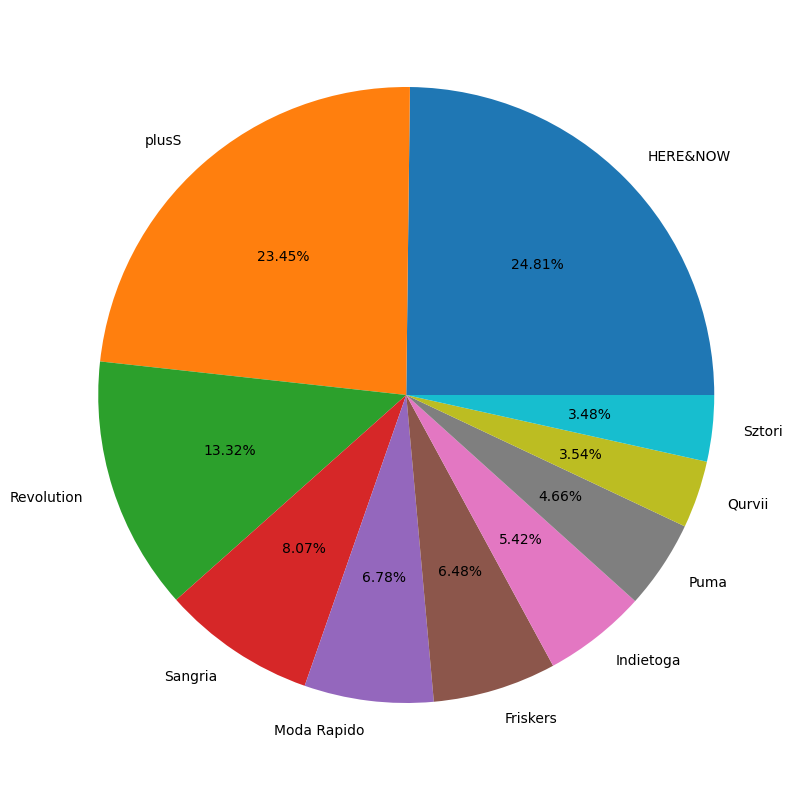

In [110]:
U  = Z['BrandName'].value_counts().head(10).values
T  = Z['BrandName'].value_counts().head(10).index

plt.figure(figsize = (20,10))
plt.pie(U[:15],labels=T[:15],autopct='%1.2f%%')
plt.show()

# Most selling category in Women & Men



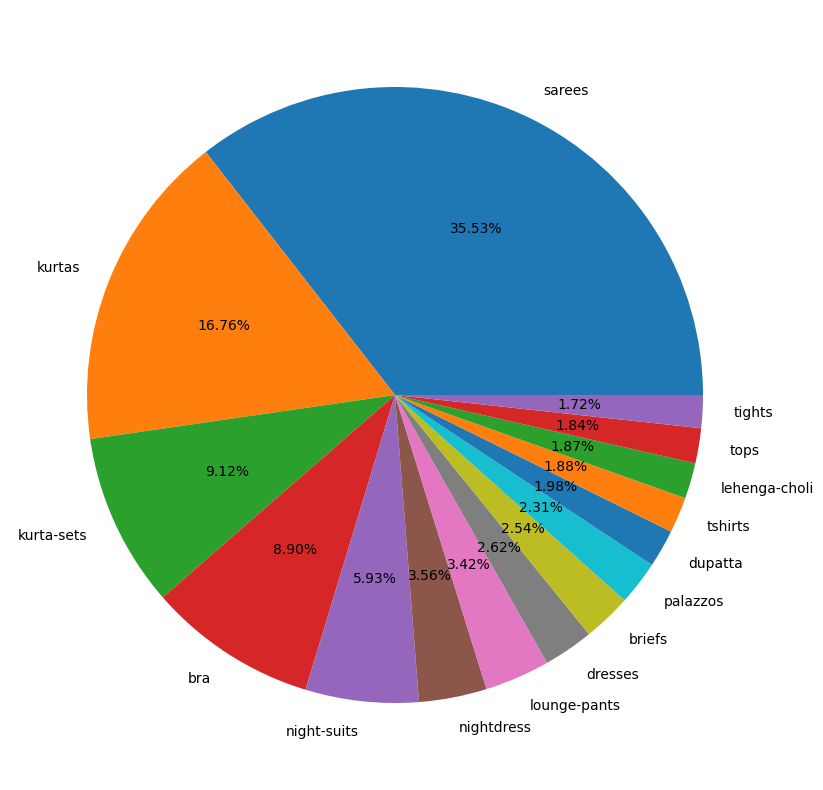

In [111]:
K = df[df['category_by_Gender'] == 'Women']
S = K['Individual_category'].value_counts().values
V = K['Individual_category'].value_counts().index

plt.figure(figsize = (20,10))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

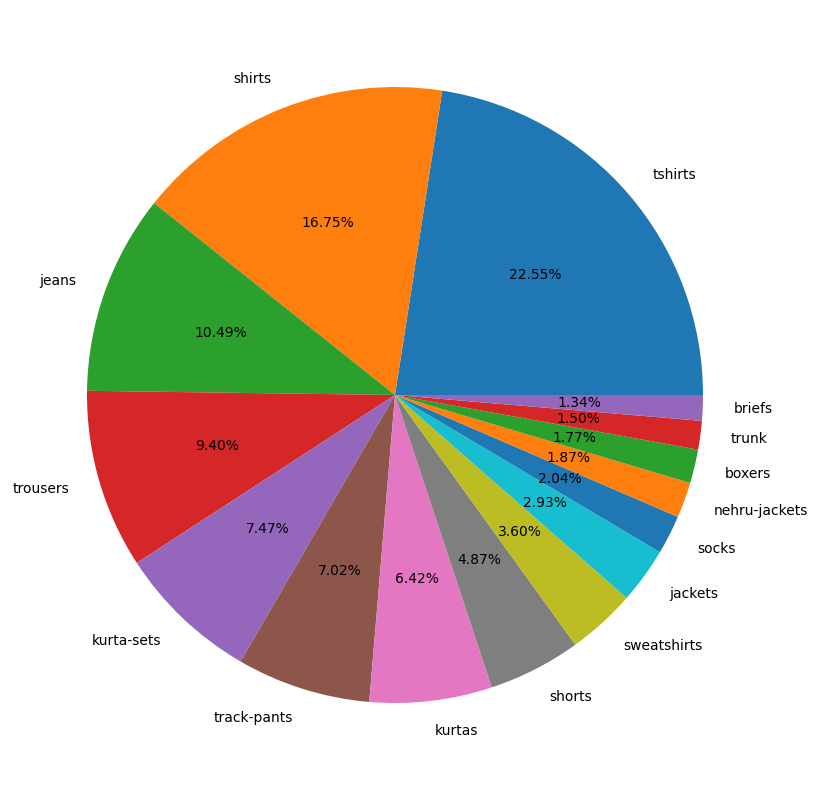

In [128]:
K = df[df['category_by_Gender'] == 'Men']
S = K['Individual_category'].value_counts().values
V = K['Individual_category'].value_counts().index

plt.figure(figsize = (20,10))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

# Most selling Brand 



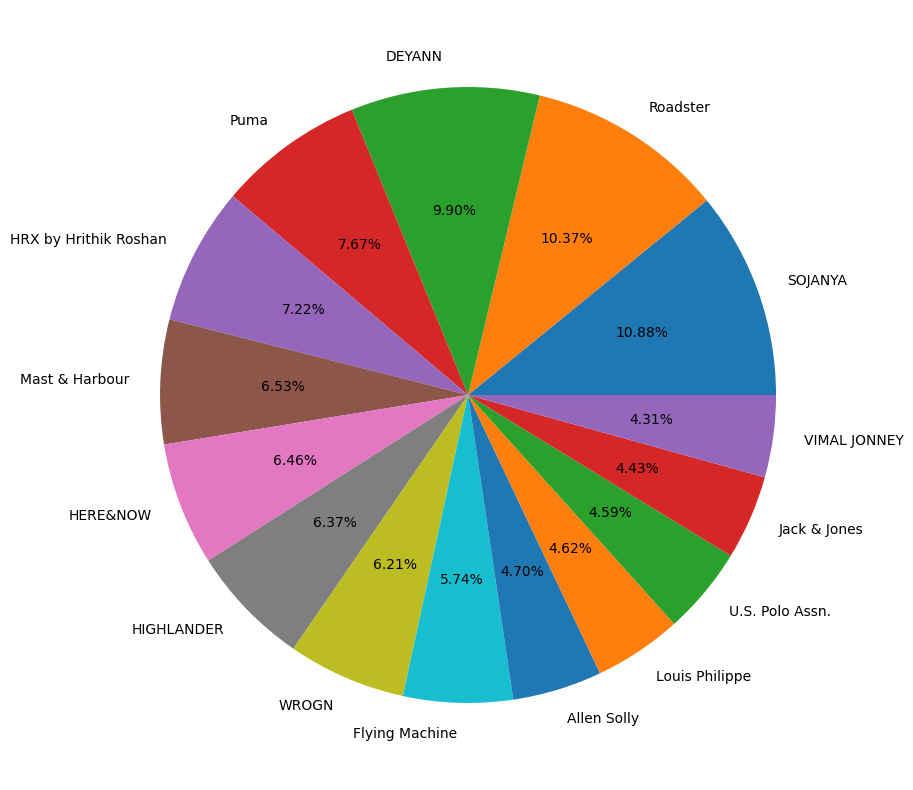

In [113]:
D= K['BrandName'].value_counts().values
W = K['BrandName'].value_counts().index

plt.figure(figsize = (20,10))

plt.pie(D[:15],labels=W[:15],autopct='%1.2f%%')
plt.show()